# Data Collection

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.patches as mpatches
import numpy as np

import warnings
warnings.filterwarnings('ignore')


raw_data = pd.read_csv("_air_passengers.csv")

# Convert Month to datetime object
raw_data['Month'] = pd.to_datetime(raw_data['Month'], format='%Y-%m')

# Set index as date
raw_data.index = raw_data['Month']

# Drop column (extra memory no longer needed)
del raw_data['Month']

print(raw_data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


# Preliminary Visual

In [2]:
def plot_config(title, axis, y_title, x_title):
    
    # Main Title
    #figure.suptitle('Categorical Plots')

    # Labels
    axis.set_title(title, fontsize=20)
    axis.set_xlabel(x_title, fontsize=15)
    axis.set_ylabel(y_title, fontsize=15)
    
    # Graph Spins
    # Plot 1: Config
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
    # Tickmark Sizes
    axis.tick_params(axis='both', which='major', labelsize=15)

def create_legend(legend_dict):
    list_patches = []
    for label in legend_dict.keys():
        color = legend_dict[label]
        list_patches.append(mpatches.Patch(color=color, label=label))
        plt.legend(handles=list_patches, loc='upper left', prop={'size': 15})

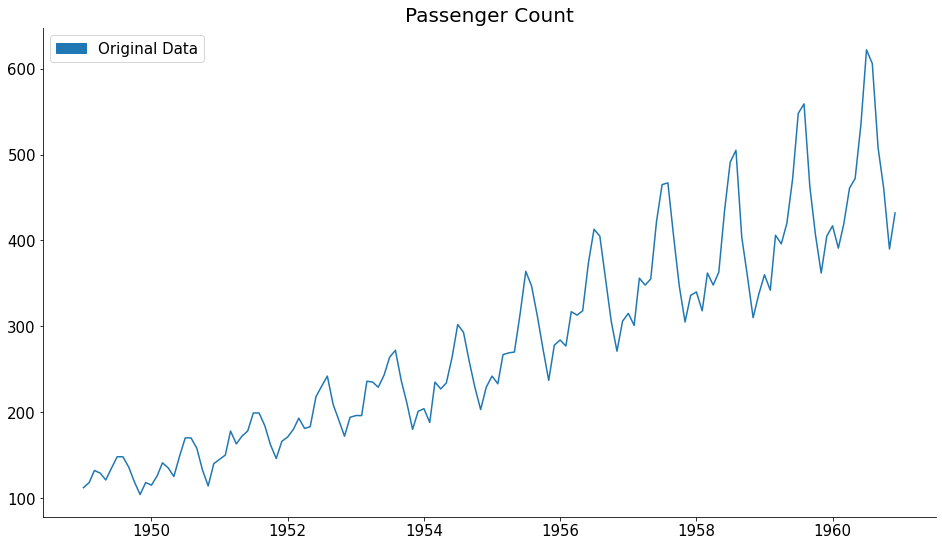

In [3]:
# Creating Figure
figure, axis = plt.subplots(figsize = (16,9))

# Time Histogram
plot_axis = axis
plot_config('Passenger Count', plot_axis,'','')

# Plot Actuals
plt.plot(raw_data['Passengers'], color='#1f77b4');

# Setting Legends
create_legend({'Original Data':'C0'})

In [5]:
# Outlier Detection - Bollinger Bands

In [52]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    """ Traders normaly use 20 days as a standard"""
    
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_down, bollinger_up

# Example: bollinger_up, bollinger_down = get_bollinger_bands(VSI_4848)[0]

def outlier_band_detection(sales):
    """ Input: sales, time series data
        We will apply get_bollinger_bands() function to the series
        and will then find the indices that are outliers
        
        Return: Set of outlier indices"""
    
    lower_band, upper_band = get_bollinger_bands(sales)
    
    outlier_indices = []
    
    for i in range(len(sales)):
        
        if (sales[i] > upper_band[i]) | (sales[i] < lower_band[i]):
            outlier_indices.append(i)
    
    return outlier_indices

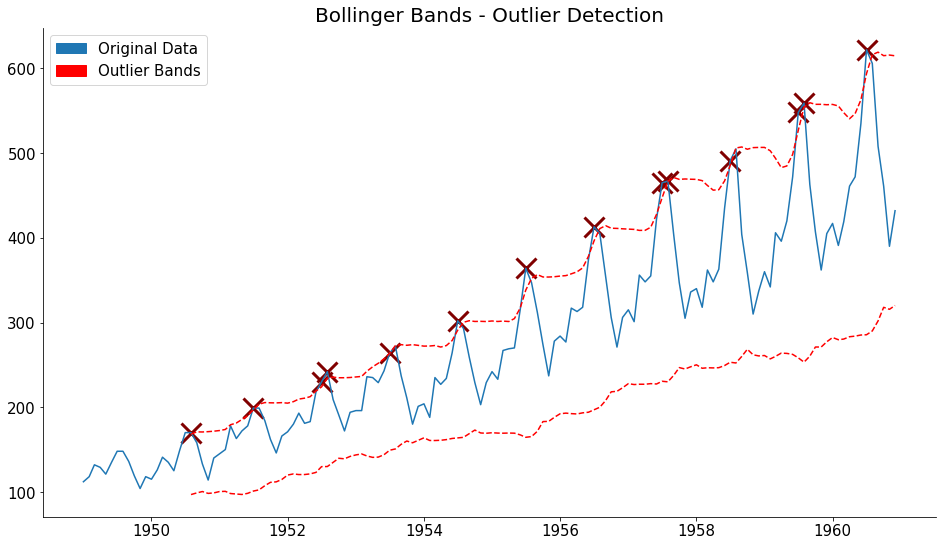

In [54]:
anomaly_point_index = outlier_band_detection(raw_data['Passengers'])
anomaly_points = raw_data.iloc[anomaly_point_index]

# Creating Figure
figure, axis = plt.subplots(figsize = (16,9))

# Time Histogram
plot_axis = axis
plot_config('Bollinger Bands - Outlier Detection', plot_axis,'','')

# Plot Actuals
plt.plot(raw_data['Passengers'], color='C0');
plt.plot(get_bollinger_bands(raw_data)[0], color='red', linestyle='--');
plt.plot(get_bollinger_bands(raw_data)[1], color='red', linestyle='--');

# Setting Legends
create_legend({'Original Data':'C0', 'Outlier Bands':'red'})

for i in range(anomaly_points.shape[0]):
    plt.scatter(anomaly_points.index[i], anomaly_points.Passengers[i], s=400, marker='x', color='maroon',linewidth=3)


# Resources
__Bollinger Bands:__  
https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3